In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/ML/train.csv",nrows=300000)

In [ ]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000009e+18,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,2,15706,320,50,1722,0,35,-1,79
1,1.000017e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
2,1.000037e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15704,320,50,1722,0,35,100084,79
3,1.000064e+19,0,14102100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,...,1,0,15706,320,50,1722,0,35,100084,79
4,1.000068e+19,0,14102100,1005,1,fe8cc448,9166c161,0569f928,ecad2386,7801e8d9,...,1,0,18993,320,50,2161,0,35,-1,157


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                300000 non-null  float64
 1   click             300000 non-null  int64  
 2   hour              300000 non-null  int64  
 3   C1                300000 non-null  int64  
 4   banner_pos        300000 non-null  int64  
 5   site_id           300000 non-null  object 
 6   site_domain       300000 non-null  object 
 7   site_category     300000 non-null  object 
 8   app_id            300000 non-null  object 
 9   app_domain        300000 non-null  object 
 10  app_category      300000 non-null  object 
 11  device_id         300000 non-null  object 
 12  device_ip         300000 non-null  object 
 13  device_model      300000 non-null  object 
 14  device_type       300000 non-null  int64  
 15  device_conn_type  300000 non-null  int64  
 16  C14               30

In [ ]:
df1=df[["click","C1","banner_pos","site_domain","site_category","app_category","device_type","C14","C15","C16","C17","C18","C19","C20","C21"]]

AttributeError: 'DataFrame' object has no attribute 'show'

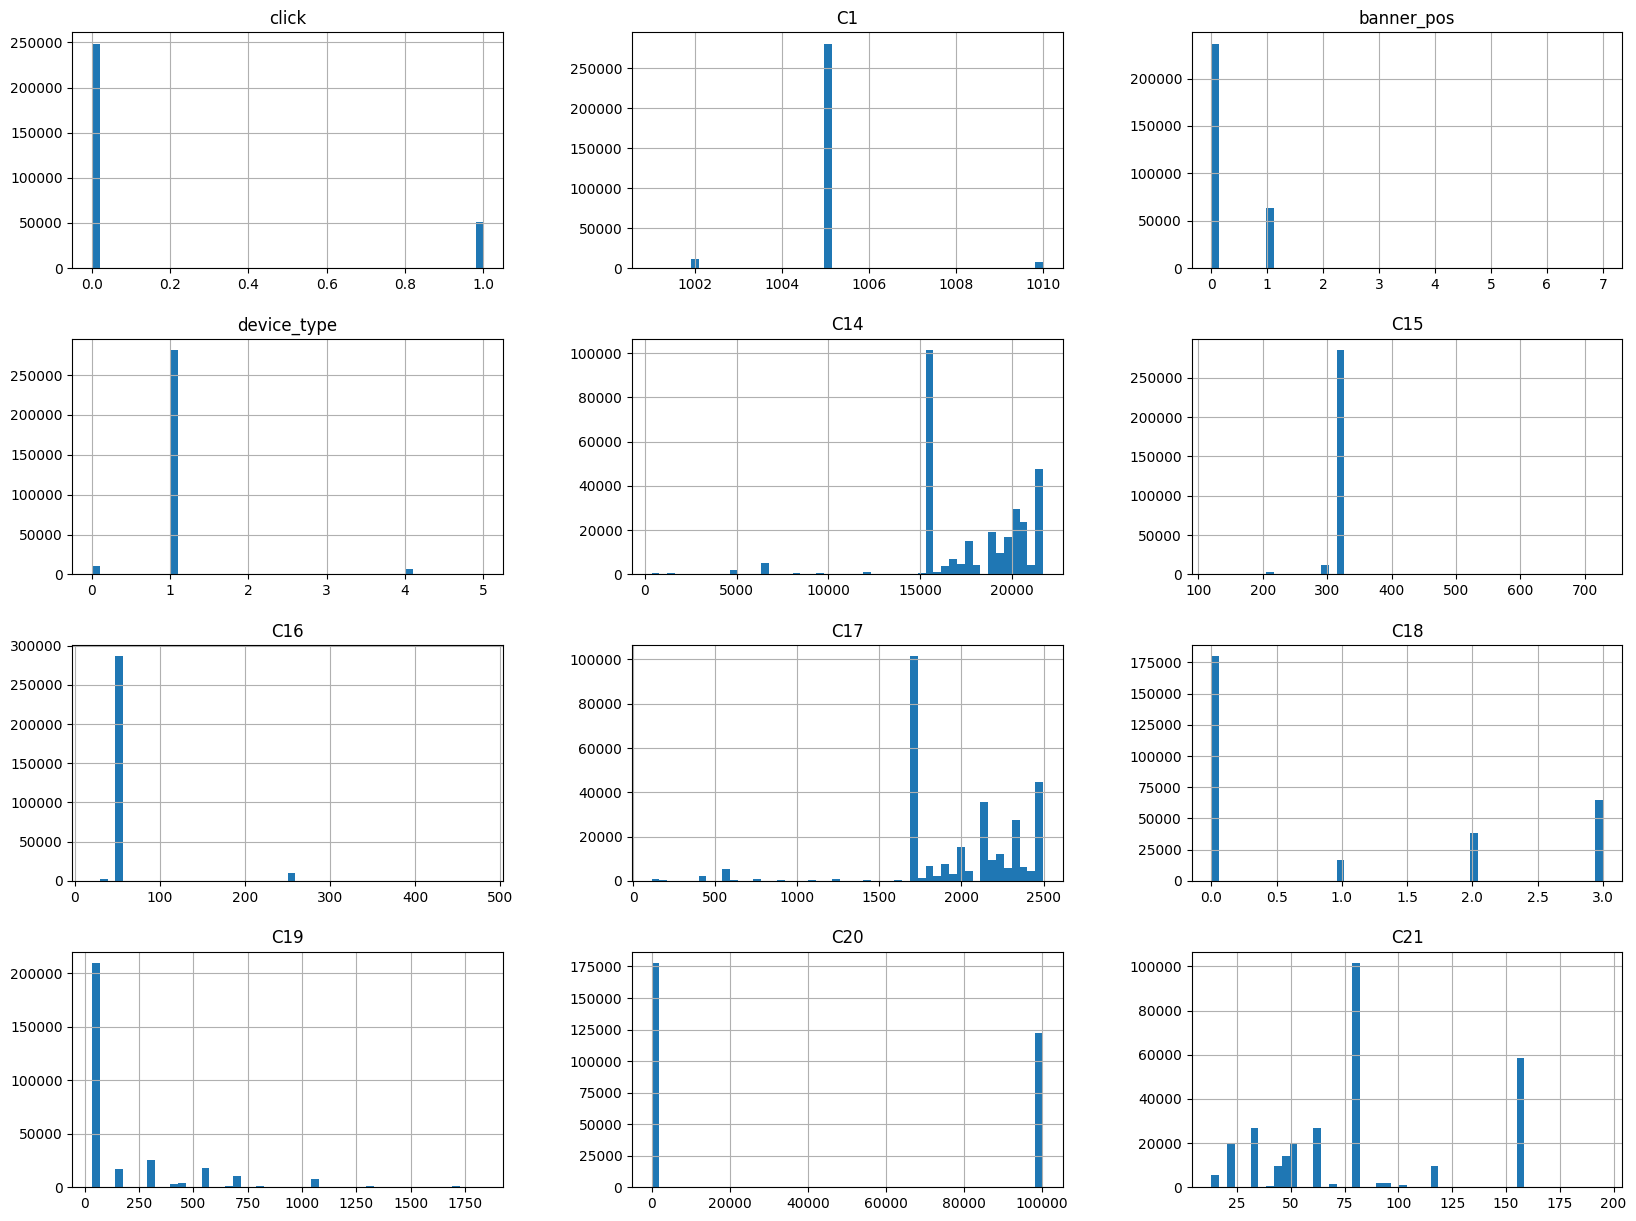

In [ ]:
import matplotlib.pyplot as plt
df1.hist(bins=50,figsize=(20,15))
df1.show()

In [ ]:
#correlation
numeric_df = df1.select_dtypes(include=['number'])
corr_matrix=numeric_df.corr()
corr_matrix["click"]

,click
click,1.000000
C1,-0.050405
banner_pos,0.040053
device_type,-0.048776
C14,-0.110738
C15,-0.040034
C16,0.145877
C17,-0.103931
C18,0.014201
C19,0.044088


In [ ]:
#encode categorical values
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_df = df1.select_dtypes(include=['object'])
for i in range (0,len(cat_df.columns)):
  df1[cat_df.columns[i]] = le.fit_transform(df1[cat_df.columns[i]])

/tmp/ipython-input-9-873055109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cat_df.columns[i]] = le.fit_transform(df1[cat_df.columns[i]])
/tmp/ipython-input-9-873055109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1[cat_df.columns[i]] = le.fit_transform(df1[cat_df.columns[i]])
/tmp/ipython-input-9-873055109.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docum

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   click          300000 non-null  int64
 1   C1             300000 non-null  int64
 2   banner_pos     300000 non-null  int64
 3   site_domain    300000 non-null  int64
 4   site_category  300000 non-null  int64
 5   app_category   300000 non-null  int64
 6   device_type    300000 non-null  int64
 7   C14            300000 non-null  int64
 8   C15            300000 non-null  int64
 9   C16            300000 non-null  int64
 10  C17            300000 non-null  int64
 11  C18            300000 non-null  int64
 12  C19            300000 non-null  int64
 13  C20            300000 non-null  int64
 14  C21            300000 non-null  int64
dtypes: int64(15)
memory usage: 34.3 MB


In [ ]:
#create train and test set
from sklearn.model_selection import train_test_split
train,test=train_test_split(df1,test_size=0.1, shuffle=False)

In [ ]:
x=train.drop('click', axis=1)
y=train["click"]

In [ ]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',min_samples_split=30,max_depth=10)
dt.fit(x,y)

DecisionTreeClassifier(max_depth=10, min_samples_split=30)

In [ ]:
yp = dt.predict(x)

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y, yp)

np.float64(0.547165369397958)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y, yp)

array([[219325,   3969],
       [ 41470,   5236]])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100,criterion='gini', min_samples_split=30,n_jobs=-1)
random_forest.fit(x,y)

RandomForestClassifier(min_samples_split=30, n_jobs=-1)

In [ ]:
yp1 = random_forest.predict(x)
from sklearn.metrics import roc_auc_score
roc_auc_score(y, yp1)

np.float64(0.5548588068770995)

In [ ]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [3, 10, None],'min_samples_split':[10,30,50]}
grid_search = GridSearchCV(random_forest, parameters, n_jobs=-1, cv=2, scoring='roc_auc',verbose=10)
grid_search.fit(x,y)

Fitting 2 folds for each of 9 candidates, totalling 18 fits


GridSearchCV(cv=2,
             estimator=RandomForestClassifier(min_samples_split=30, n_jobs=-1),
             n_jobs=-1,
             param_grid={'max_depth': [3, 10, None],
                         'min_samples_split': [10, 30, 50]},
             scoring='roc_auc', verbose=10)

In [ ]:
grid_search.best_params_

{'max_depth': None, 'min_samples_split': 50}

In [ ]:
random_forest_best = grid_search.best_estimator_
pos_prob = random_forest_best.predict_proba(x)[:, 1]
roc_auc_score(y, pos_prob)

np.float64(0.7516446424036682)

In [ ]:
!pip install xgboost

In [ ]:
import xgboost as xgb
model = xgb.XGBClassifier(learning_rate=0.1, max_depth=10, n_estimators=1000)
model.fit(x,y)
pos_prob = model.predict_proba(x)[:, 1]

In [ ]:
roc_auc_score(y, pos_prob)

np.float64(0.7574181221261425)

In [ ]:
xt=test.drop('click', axis=1)
yt=test["click"]

In [ ]:
ypt = model.predict_proba(xt)[:, 1]
roc_auc_score(yt, ypt)

np.float64(0.742052719092055)

In [ ]:
import pandas as pd
df2=pd.read_csv("/content/drive/MyDrive/ML/test.csv")

In [ ]:
df2.head()

,id,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,1.000017e+19,14103100,1005,0,235ba823,f6ebf28e,f028772b,ecad2386,7801e8d9,07d7df22,...,1,0,8330,320,50,761,3,175,100075,23
1,1.000018e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
2,1.000055e+19,14103100,1005,0,1fbe01fe,f3845767,28905ebd,ecad2386,7801e8d9,07d7df22,...,1,0,22676,320,50,2616,0,35,100083,51
3,1.000109e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,51cedd4e,aefc06bd,0f2161f8,...,1,0,18648,320,50,1092,3,809,100156,61
4,1.000138e+19,14103100,1005,0,85f751fd,c4e18dd6,50e219e0,9c13b419,2347f47a,f95efa07,...,1,0,23160,320,50,2667,0,47,-1,221


In [ ]:
df3=df2[["C1","banner_pos","site_domain","site_category","app_category","device_type","C14","C15","C16","C17","C18","C19","C20","C21"]]

In [ ]:
cat_df2 = df3.select_dtypes(include=['object'])
for i in range (0,len(cat_df2.columns)):
  df3[cat_df2.columns[i]] = le.fit_transform(df3[cat_df2.columns[i]])

/tmp/ipython-input-50-3787888133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[cat_df2.columns[i]] = le.fit_transform(df3[cat_df2.columns[i]])
/tmp/ipython-input-50-3787888133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3[cat_df2.columns[i]] = le.fit_transform(df3[cat_df2.columns[i]])
/tmp/ipython-input-50-3787888133.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

In [ ]:
yptrue = model.predict(df3)

In [ ]:
dftest= pd.DataFrame(data=yptrue, columns=['y_pred'])

In [ ]:
dftest['y_pred'].unique()

array([0, 1])

In [ ]:
dftest.to_csv('ypred.csv', index=False)

In [1]:
import pandas as pd
df=pd.read_csv("ypred.csv")

In [4]:
df.head()

,id,click
0,10000200000000000000,0
1,10000600000000000000,0
2,10001100000000000000,0
3,10001400000000000000,0
4,10001500000000000000,0


In [5]:
df = df.sort_values('click', ascending=False).drop_duplicates('id')

In [7]:
df.to_csv("y-pred.csv")